# Tabular ANN for Exploration of DEAP Dataset
Adaboost forest for windowed DMD modes
Try individual


In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import datasets, svm, metrics, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
PATH = "/media/tris/tris_files/EEG_datasets/DMD/tabular"

In [10]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/DMD/tabular/dmd_deap_100modes_trials2.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
0,1,1,-0.233814,-0.969863,1.700171,0.720502,0.177535,-0.046507,1.072643,-0.120264,...,0.166065,0.280451,0.114258,0.109801,0.173911,0.157928,0.191574,0.137560,0.177926,0.207574
1,1,2,-0.993878,-0.016554,1.770978,-0.831954,0.097792,-0.621644,0.577972,1.328111,...,0.171891,0.106523,0.133571,0.194492,0.244793,0.159942,0.161214,0.197641,0.201198,0.182560
2,1,3,0.583622,0.629451,-0.735135,-1.448728,-0.377700,0.173252,-0.779868,-0.060316,...,0.123279,0.182684,0.162244,0.228377,0.186304,0.241429,0.172226,0.168193,0.269286,0.213699
3,1,4,-0.012731,1.519274,0.444013,0.687163,1.043211,-0.787845,0.113916,1.043668,...,0.190128,0.181409,0.141337,0.111817,0.194721,0.147402,0.199616,0.229632,0.167897,0.203443
4,1,5,-0.142715,0.161444,0.754088,1.518170,-1.628491,0.075984,-0.649745,-0.974299,...,0.123980,0.180104,0.127765,0.191395,0.117568,0.113275,0.221683,0.139448,0.163605,0.184403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,32,36,0.402701,0.698310,-0.014948,0.628291,0.727424,0.667963,0.460412,0.362815,...,0.096206,0.138511,0.115592,0.116468,0.176696,0.161931,0.155996,0.202108,0.212839,0.160285
1276,32,37,0.335937,0.687189,-0.209331,0.414581,-0.870939,0.714841,0.354585,-0.404037,...,0.114424,0.170725,0.240344,0.121923,0.173749,0.115140,0.189734,0.141533,0.227506,0.223675
1277,32,38,-0.822827,-0.549796,-1.011708,-1.082957,0.996392,-0.766131,-0.839676,0.825158,...,0.311907,0.115688,0.145812,0.138956,0.196466,0.161459,0.140366,0.235394,0.206119,0.178013
1278,32,39,-0.794072,0.698358,-0.938047,-5.002665,-0.472358,-0.935446,-1.867492,-1.125174,...,0.137895,0.114168,0.102125,0.262071,0.206464,0.166950,0.186174,0.153145,0.188538,0.212354


In [11]:
df_raw.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
40,2,1,2.103902,-1.555795,-4.76561,1.745002,-0.038243,-1.276566,-0.490062,-2.453432,...,0.167794,0.265412,0.061066,0.129821,0.096107,0.267482,0.119305,0.125482,0.1402,0.182562


In [12]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/eeg-raw')

In [13]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
0,1,1,-0.233814,-0.969863,1.700171,0.720502,0.177535,-0.046507,1.072643,-0.120264,...,0.166065,0.280451,0.114258,0.109801,0.173911,0.157928,0.191574,0.137560,0.177926,0.207574
1,1,2,-0.993878,-0.016554,1.770978,-0.831954,0.097792,-0.621644,0.577972,1.328111,...,0.171891,0.106523,0.133571,0.194492,0.244793,0.159942,0.161214,0.197641,0.201198,0.182560
2,1,3,0.583622,0.629451,-0.735135,-1.448728,-0.377700,0.173252,-0.779868,-0.060316,...,0.123279,0.182684,0.162244,0.228377,0.186304,0.241429,0.172226,0.168193,0.269286,0.213699
3,1,4,-0.012731,1.519274,0.444013,0.687163,1.043211,-0.787845,0.113916,1.043668,...,0.190128,0.181409,0.141337,0.111817,0.194721,0.147402,0.199616,0.229632,0.167897,0.203443
4,1,5,-0.142715,0.161444,0.754088,1.518170,-1.628491,0.075984,-0.649745,-0.974299,...,0.123980,0.180104,0.127765,0.191395,0.117568,0.113275,0.221683,0.139448,0.163605,0.184403


In [14]:
df_raw.iloc[[500],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
500,13,21,-0.636539,1.753147,-2.544426,-2.368353,-0.251682,-1.778326,0.345435,0.820399,...,0.267574,0.313899,0.172418,0.129389,0.193406,0.161502,0.171978,0.207269,0.203898,0.220929


In [18]:
path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [19]:
df=df.div(9);  #normalize
df_norm=df

In [20]:
df_norm.loc[(df_norm['valence'] >= 0.5) & (df_norm['arousal'] >= 0.5), 'emotion_quad'] = 'HVHA'
df_norm.loc[(df_norm['valence'] <= 0.5) & (df_norm['arousal'] >= 0.5), 'emotion_quad'] = 'LVHA'
df_norm.loc[(df_norm['valence'] <= 0.5) & (df_norm['arousal'] <= 0.5), 'emotion_quad'] = 'LVLA'  
df_norm.loc[(df_norm['valence'] >= 0.5) & (df_norm['arousal'] <= 0.5), 'emotion_quad'] = 'HVLA'
df_norm.tail()

,valence,arousal,dominance,liking,emotion_quad
1275,0.434444,0.773333,0.646667,0.346667,LVHA
1276,0.312222,0.681111,0.673333,0.115556,LVHA
1277,0.338889,0.778889,0.566667,0.122222,LVHA
1278,0.443333,0.796667,0.538889,0.111111,LVHA
1279,0.794444,0.447778,1.000000,0.208889,HVLA


In [21]:
emotion_quad = df_norm['emotion_quad']
subject = df_raw['Subject']
df_norm = df_norm.join(subject)
df_norm.head()

,valence,arousal,dominance,liking,emotion_quad,Subject
0,0.856667,0.844444,0.766667,0.870000,HVHA,1
1,0.900000,0.812222,0.808889,0.941111,HVHA,1
2,0.953333,0.837778,1.000000,0.786667,HVHA,1
3,0.548889,0.667778,0.680000,0.895556,HVHA,1
4,0.773333,0.435556,0.798889,0.672222,HVLA,1


Text(0.5, 1.0, 'label')

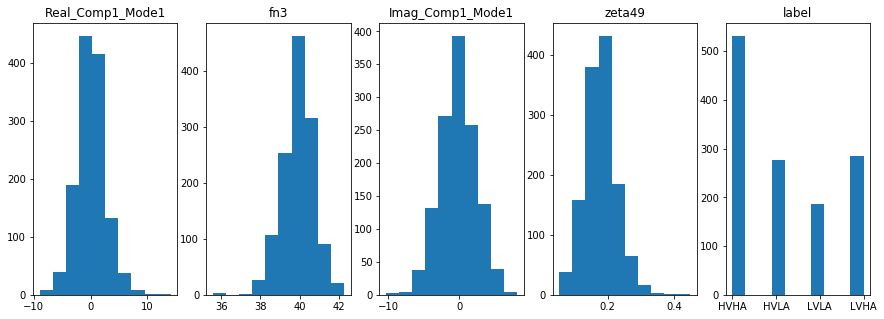

In [22]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_raw.fn3)
axs[1].set_title('fn3')
axs[2].hist(df_raw.Imag_Comp1_Mode1)
axs[2].set_title('Imag_Comp1_Mode1')
axs[3].hist(df_raw.zeta49)
axs[3].set_title('zeta49')
axs[4].hist(df_norm.emotion_quad)
axs[4].set_title('label')

In [23]:
df1_raw = df_raw[(df_raw['Subject'] == 2)]
df1_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
40,2,1,2.103902,-1.555795,-4.765610,1.745002,-0.038243,-1.276566,-0.490062,-2.453432,...,0.167794,0.265412,0.061066,0.129821,0.096107,0.267482,0.119305,0.125482,0.140200,0.182562
41,2,2,1.631807,2.227072,1.163584,1.419275,0.734492,-3.461629,-1.068938,-2.282691,...,0.132345,0.169695,0.134851,0.119459,0.192655,0.212377,0.129319,0.155869,0.130466,0.179535
42,2,3,1.906974,1.822332,1.207314,4.414523,0.777344,0.455845,-1.261599,-1.856478,...,0.266821,0.123886,0.158840,0.150704,0.127675,0.173046,0.147221,0.158259,0.157267,0.152181
43,2,4,-2.091702,-0.192478,-1.636512,-0.154975,0.588393,0.512845,-0.347444,2.721524,...,0.189978,0.095399,0.116610,0.108774,0.219130,0.195449,0.158308,0.150860,0.166880,0.153681
44,2,5,-2.225908,-7.289456,-1.949366,-2.118999,0.279073,-0.464314,1.733646,-0.498377,...,0.110120,0.268386,0.187633,0.116420,0.093053,0.135957,0.140900,0.191306,0.184582,0.139382
45,2,6,-3.240976,3.719000,0.482952,0.303539,3.385642,-1.075614,-1.571424,0.112566,...,0.136111,0.110368,0.259194,0.147036,0.103501,0.107859,0.186071,0.118361,0.144865,0.159549
46,2,7,-3.193736,-1.215932,-2.291429,-1.631110,0.844074,0.684634,0.624433,-0.897352,...,0.153082,0.161227,0.242552,0.173303,0.121164,0.166576,0.205726,0.104037,0.181946,0.164039
47,2,8,-1.727961,-1.431096,-0.091468,0.249186,0.168432,4.187601,1.128717,1.811560,...,0.203870,0.178015,0.154466,0.131627,0.199708,0.141155,0.204004,0.221546,0.187672,0.148404
48,2,9,-2.119418,-1.115082,1.387641,-1.053014,2.352287,-0.139478,0.983749,2.789795,...,0.144441,0.232130,0.086498,0.177486,0.218679,0.165292,0.154337,0.108594,0.194581,0.201581
49,2,10,1.989829,1.617272,0.695681,0.049901,-3.797356,0.403250,-1.367397,2.609644,...,0.167816,0.097737,0.172264,0.132321,0.134354,0.160330,0.127638,0.156724,0.203041,0.229382


In [24]:
emotion_quad1 = emotion_quad[(df_norm['Subject'] == 2)]
emotion_quad1

40    HVHA
41    HVHA
42    HVHA
43    HVLA
44    HVLA
45    HVHA
46    HVLA
47    HVHA
48    HVHA
49    HVLA
50    HVLA
51    HVHA
52    HVHA
53    HVHA
54    HVHA
55    HVHA
56    HVLA
57    HVHA
58    HVHA
59    HVHA
60    LVLA
61    HVLA
62    LVLA
63    HVHA
64    HVHA
65    HVHA
66    HVHA
67    LVHA
68    LVHA
69    LVHA
70    LVHA
71    LVHA
72    HVHA
73    HVLA
74    LVLA
75    HVLA
76    LVHA
77    LVHA
78    LVLA
79    HVHA
Name: emotion_quad, dtype: object

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df_raw, emotion_quad, test_size=0.2, shuffle=True)

In [31]:
classifier = AdaBoostClassifier(n_estimators=100)

In [32]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [33]:
predicted = classifier.predict(X_test)

Classification report for classifier AdaBoostClassifier(n_estimators=100):
              precision    recall  f1-score   support

        HVHA       0.45      0.62      0.52       106
        HVLA       0.30      0.29      0.29        55
        LVHA       0.50      0.37      0.42        57
        LVLA       0.00      0.00      0.00        38

    accuracy                           0.40       256
   macro avg       0.31      0.32      0.31       256
weighted avg       0.36      0.40      0.37       256


Confusion matrix:
[[66 23 12  5]
 [31 16  4  4]
 [30  3 21  3]
 [21 12  5  0]]


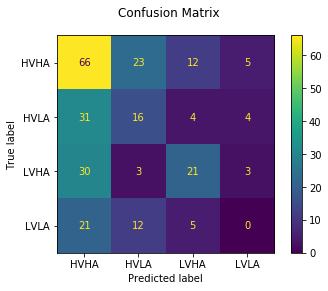

In [34]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [35]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores.mean()

0.40922046867527506

In [36]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [37]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[('HVHA', 149), ('HVLA', 149), ('LVHA', 149), ('LVLA', 149)]


In [38]:
classifier = AdaBoostClassifier(n_estimators=20)

In [39]:
classifier.fit(X_resampled, y_resampled)

AdaBoostClassifier(n_estimators=20)

In [40]:
predicted = classifier.predict(X_test)

Classification report for classifier AdaBoostClassifier(n_estimators=20):
              precision    recall  f1-score   support

        HVHA       0.58      0.28      0.38       106
        HVLA       0.24      0.42      0.31        55
        LVHA       0.37      0.35      0.36        57
        LVLA       0.27      0.39      0.32        38

    accuracy                           0.34       256
   macro avg       0.36      0.36      0.34       256
weighted avg       0.41      0.34      0.35       256


Confusion matrix:
[[30 51 14 11]
 [10 23 10 12]
 [ 8 11 20 18]
 [ 4  9 10 15]]


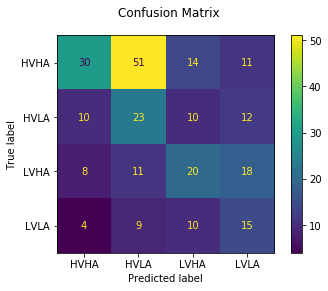

In [41]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    df1_raw, emotion_quad1, test_size=0.2, shuffle=True)

In [52]:
classifier = svm.SVC()

In [53]:
classifier.fit(X_train, y_train)

SVC()

In [54]:
predicted = classifier.predict(X_test)

Classification report for classifier SVC():
              precision    recall  f1-score   support

        HVHA       0.50      1.00      0.67         4
        HVLA       0.00      0.00      0.00         3
        LVHA       0.00      0.00      0.00         1

    accuracy                           0.50         8
   macro avg       0.17      0.33      0.22         8
weighted avg       0.25      0.50      0.33         8


Confusion matrix:
[[4 0 0]
 [3 0 0]
 [1 0 0]]


/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


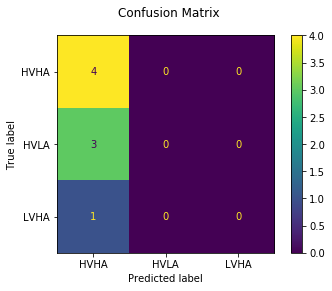

In [55]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)